In [ ]:
# Autistic Spectrum Disorder Screening
import pandas as pd
from sklearn import model_selection
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam 
from sklearn.metrics import classification_report, accuracy_score

# import the dataset
file ='/content/sample_data/dataset.csv'
names = ['A1_Score',
        'A2_Score', 
        'A3_Score',                            
        'A4_Score',                           
        'A5_Score',                            
        'A6_Score',                           
        'A7_Score',                            
        'A8_Score',                           
        'A9_Score',                            
        'A10_Score',                          
        'age',                        
        'gender ',                             
        'ethnicity',                     
        'jundice',                        
        'family_history_of_PDD',         
        'contry_of_res',                 
        'used_app_before',                
        'result',                         
        'age_desc',                
        'relation',         
        'class'
    ]
data = pd.read_csv(file, names=names)

# print the shape of the dtaframe, so we can see how many examples we have
print ('Shape of dataframe: {}'.format(data.shape))
print (data.loc[0])
# display multiple patients
print (data.loc[:10])
# description of the dataframe
print (data.describe())

# Data Preprocessing

# drop unwanted columns
data = data.drop(['result', 'age_desc'], axis=1)
print (data.loc[:10])
# create X and Y dataset for training
x = data.drop(['class'],1)
y = data['class']
print (x.loc[:10])

# convert the data to categorical values -one-hot-encoded vectors
X = pd.get_dummies(x)
#print the new categorical labels
print (X.columns.values)
# print an example patient from the categorical data
print (X.loc[1])
# covert the class data to categorical values -one-hot-encoded vectors
Y = pd.get_dummies(y)
print (Y.iloc[:10])

# Split the X and Y data into training and testing datasets
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2)
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

# Build a neural network using Keras
'''This model will be relatively simple and will only use dense (also known as fully connected) layers.
This is the most common neural network layer. The network will have one hidden layer, use an Adam optimizer,
and a categorical crossentropy loss.''' 

# define a function to build the keras model
def create_model():
    model = Sequential()
    model.add(Dense(8, input_dim=149, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='sigmoid'))

    adam=Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()
print(model.summary())

# Training the network - fit the model to the training data
model.fit(X_train, Y_train, epochs = 100, batch_size=10, verbose =1)

# Testing and Performance metrics

# generate classification report using predictions for categorical model
predictions = model.predict_classes(X_test)
print (predictions)
print('Prediction Reults for Neural Network')
print(accuracy_score(Y_test[['YES']], predictions))
print(classification_report(Y_test[['YES']], predictions))

#prediction for any example
example = X_test.iloc[1]
print(example)
prediction = model.predict_classes(example.values.reshape(1,-1))
print(prediction)


Shape of dataframe: (704, 21)
A1_Score                               1
A2_Score                               1
A3_Score                               1
A4_Score                               1
A5_Score                               0
A6_Score                               0
A7_Score                               1
A8_Score                               1
A9_Score                               0
A10_Score                              0
age                                   26
gender                                 f
ethnicity                 White-European
jundice                               no
family_history_of_PDD                 no
contry_of_res            'United States'
used_app_before                       no
result                                 6
age_desc                   '18 and more'
relation                            Self
class                                 NO
Name: 0, dtype: object
    A1_Score  A2_Score  ...                    relation  class
0          1         1 

SVM METHOD

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2, stratify=y)

# 6. Create an SVM classifier and train it on 66% of the data set.
clf = SVC(probability=True)
clf.fit(X_train, y_train)

 #7. Analyze accuracy of predictions on 33% of the holdout test sample.
classifier_score = clf.score(X_test, y_test)
print('\nThe classifier accuracy score is {:03.5f}\n'.format(classifier_score*100))


The classifier accuracy score is 95.70815



In [ ]:
import sklearn.metrics as metrics
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[170   0]
 [ 10  53]]


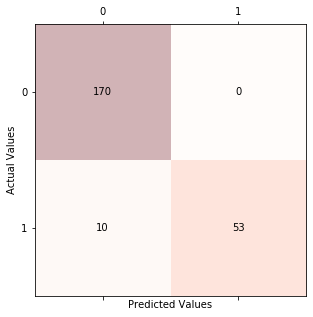

              precision    recall  f1-score   support

          NO       0.94      1.00      0.97       170
         YES       1.00      0.84      0.91        63

    accuracy                           0.96       233
   macro avg       0.97      0.92      0.94       233
weighted avg       0.96      0.96      0.96       233



In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Image, display

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Reds, alpha=0.3)
for i in range(cm.shape[0]):
     for j in range(cm.shape[1]):
         ax.text(x=j, y=i,
                s=cm[i, j], 
                va='center', ha='center')
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred ))

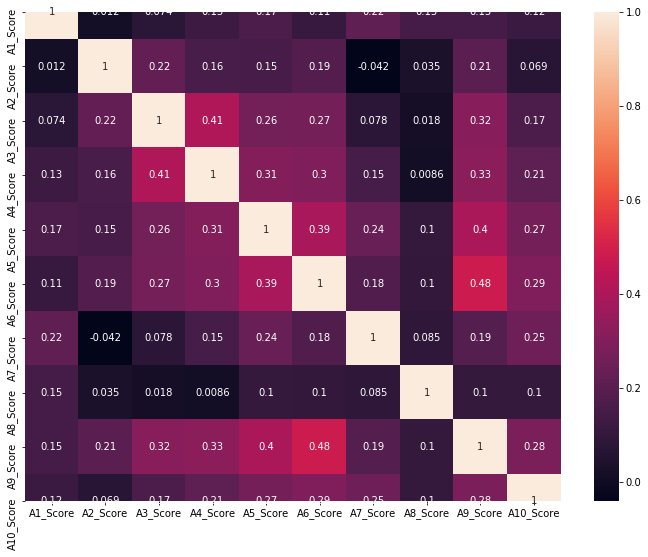

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 9))
corr = data.corr()
sns.heatmap(corr,annot = True)

Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:

# Train the model on Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=10)
dtree.fit(X_train, y_train)
print('Train score: {:.4f}'.format(dtree.score(X_train,y_train)))
print('Test score: {:.4f}'.format(dtree.score(X_test, y_test)))

Train score: 1.0000
Test score: 0.8723


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
pred = dtree.predict(X_test)
print (accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

# Confusion Matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, pred)
print(confusion)

0.8723404255319149
              precision    recall  f1-score   support

          NO       0.91      0.91      0.91       103
         YES       0.76      0.76      0.76        38

    accuracy                           0.87       141
   macro avg       0.84      0.84      0.84       141
weighted avg       0.87      0.87      0.87       141

[[94  9]
 [ 9 29]]


Random Forest

In [ ]:

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5, random_state=1)
rf.fit(X_train,y_train)
print("Train Score : {}".format(rf.score(X_train,y_train)))
print("Test Score : {}".format(rf.score(X_test,y_test)))



# K cross validation
from sklearn.model_selection import cross_val_score 
cv_scores = cross_val_score(rf, X, y, cv=10)

cv_scores.mean()

Train Score : 0.9946714031971581
Test Score : 0.900709219858156


0.9075613098883155

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
pred = rf.predict(X_test)
print (accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

#Confusion Matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, pred)
print(confusion)

0.9716312056737588
              precision    recall  f1-score   support

          NO       0.98      0.98      0.98       103
         YES       0.95      0.95      0.95        38

    accuracy                           0.97       141
   macro avg       0.96      0.96      0.96       141
weighted avg       0.97      0.97      0.97       141

[[101   2]
 [  2  36]]


Gaussian N B

In [ ]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
gauss.fit(X_train,y_train)
y_predic=gauss.predict(X_test)
acc_g = gauss.score(X_train,y_train)*100
print(classification_report(y_test, y_pred_per))
print(acc_g)

              precision    recall  f1-score   support

          NO       0.99      1.00      1.00       103
         YES       1.00      0.97      0.99        38

    accuracy                           0.99       141
   macro avg       1.00      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141

41.207815275310836


Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
percept = Perceptron(max_iter = 100)
percept.fit(X_train,y_train)
y_pred_per = percept.predict(X_test)
acc_p = percept.score(X_train,y_train)*100
print(classification_report(y_test, y_pred_per))
print(acc_p)


              precision    recall  f1-score   support

          NO       0.99      1.00      1.00       103
         YES       1.00      0.97      0.99        38

    accuracy                           0.99       141
   macro avg       1.00      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141

100.0


KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( n_neighbors = 5)
knn.fit(X_train, y_train)
print("Train Score : {}".format(knn.score(X_train,y_train)))
print("Test Score : {}".format(knn.score(X_test,y_test)))

knn_cvscore =  cross_val_score(knn, X, y, cv=10)
knn_cvscore.mean()

pred = knn.predict(X_test)
print (accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

#Confusion Matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, pred)
print(confusion)





Train Score : 0.9609236234458259
Test Score : 0.9290780141843972
0.9290780141843972
              precision    recall  f1-score   support

          NO       0.94      0.96      0.95       103
         YES       0.89      0.84      0.86        38

    accuracy                           0.93       141
   macro avg       0.92      0.90      0.91       141
weighted avg       0.93      0.93      0.93       141

[[99  4]
 [ 6 32]]


Logistic Regression

In [ ]:

from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train,y_train)

print("Train Score : {}".format(lreg.score(X_train,y_train)))
print("Test Score : {}".format(lreg.score(X_test,y_test)))

lreg_cvscore =  cross_val_score(lreg, X, y, cv=10)
lreg_cvscore.mean()

pred = lreg.predict(X_test)
print (accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

#Confusion Matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, pred)
print(confusion)

Train Score : 0.9964476021314387
Test Score : 0.9929078014184397
0.9929078014184397
              precision    recall  f1-score   support

          NO       0.99      1.00      1.00       103
         YES       1.00      0.97      0.99        38

    accuracy                           0.99       141
   macro avg       1.00      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141

[[103   0]
 [  1  37]]


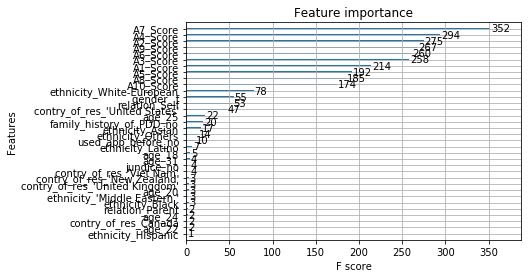

In [ ]:
from xgboost import XGBClassifier
XGB = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
XGB.fit(X_train, y_train)

from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(XGB)
plt.show()

In [ ]:
data.columns


Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender ',
       'ethnicity', 'jundice', 'family_history_of_PDD', 'contry_of_res',
       'used_app_before', 'relation', 'class'],
      dtype='object')

In [ ]:
print(data.dtypes)
total = len(data.index)
positive = len(data[data['class']=="YES"])
negative = len(data[data['class']=="NO"])

print ("Total number of records: {}".format(total))
print( "Total number of positive autism cases:{}".format(positive))
print( "Total number of negative autism cases:{}".format(negative))

A1_Score                  int64
A2_Score                  int64
A3_Score                  int64
A4_Score                  int64
A5_Score                  int64
A6_Score                  int64
A7_Score                  int64
A8_Score                  int64
A9_Score                  int64
A10_Score                 int64
age                      object
gender                   object
ethnicity                object
jundice                  object
family_history_of_PDD    object
contry_of_res            object
used_app_before          object
relation                 object
class                    object
dtype: object
Total number of records: 704
Total number of positive autism cases:189
Total number of negative autism cases:515


stochastic gradient descent

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn import linear_model

sgd = linear_model.SGDClassifier(max_iter = 7,tol =None)
sgd.fit(X_train,y_train)
Y_pred_sgd= sgd.predict(X_test)
sgd.score(X_train,y_train)


1.0

In [ ]:
pred = sgd.predict(X_test)
print (accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.9929078014184397
              precision    recall  f1-score   support

          NO       0.99      1.00      1.00       103
         YES       1.00      0.97      0.99        38

    accuracy                           0.99       141
   macro avg       1.00      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141



Text(0.5, 1.0, 'Age distribution of ASD positive')

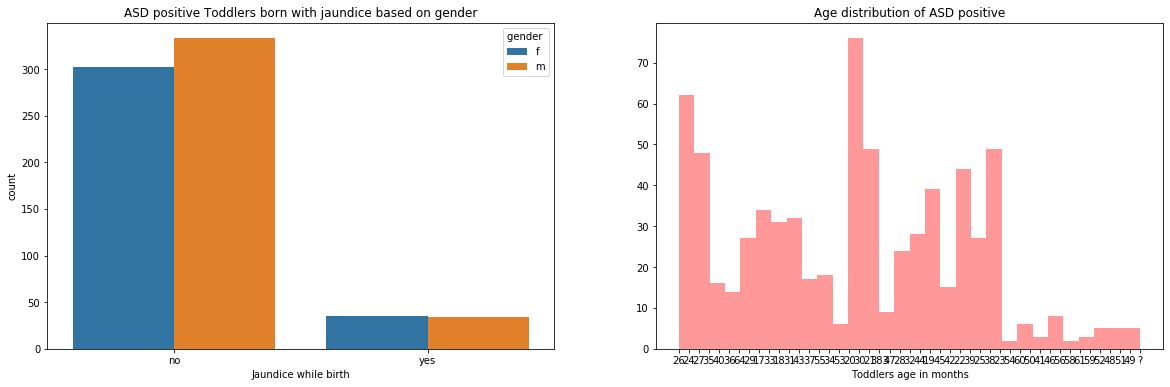

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.countplot(x='jundice',data=data,hue='gender ',ax=ax[0])
ax[0].set_title('ASD positive Toddlers born with jaundice based on gender')
ax[0].set_xlabel('Jaundice while birth')
sns.distplot(data['age'],kde=False,bins=30,color='red',ax=ax[1])
ax[1].set_xlabel('Toddlers age in months')
ax[1].set_title('Age distribution of ASD positive')

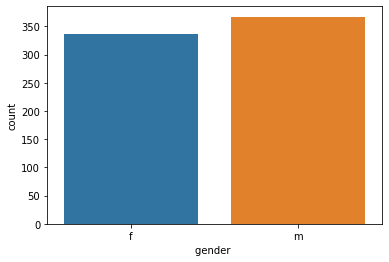

In [ ]:
sns.countplot(x='gender ',data=data)

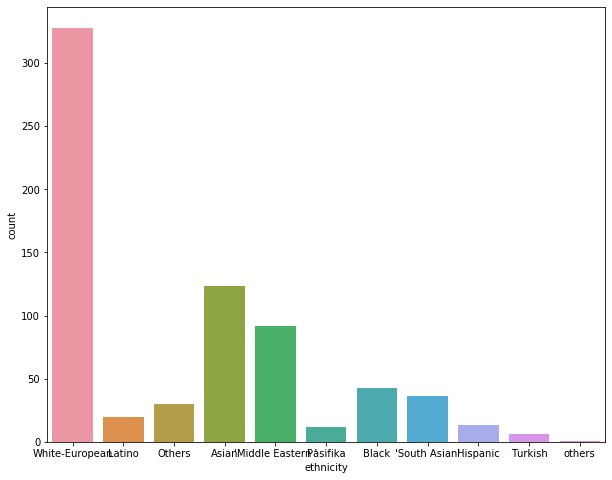

In [ ]:

plt.figure(figsize=(10,8))
sns.countplot(x='ethnicity',data=data)

Comparing Different mODELS USING OUTPUTS (error)




In [ ]:

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

def f1_scores(Z, y_test):
    averages = ['macro', 'micro', 'weighted']
    for avg in averages:
        score = f1_score(Z, y_test, average=avg)
        print("f1 score ({}): {}".format(avg, score))

def test_model(X, y, model_name, model):
    print("MODEL: {}".format(model_name))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model.fit(X_train, y_train)
    Z = model.predict(X_test)
    f1_scores(Z, y_test)
    
def testModelKFold(X, y, model_name, model, k):
    print("CROSS VALIDATION FOR: {}".format(model_name))
    skf = StratifiedKFold(n_splits=5)
    skf.get_n_splits(X, y)
    f1_scores = []
    f1_scores_train = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        Z = model.predict(X_test)
        f1_scores.append(f1_score(Z, y_test))
        Z_train = model.predict(X_train)
        f1_scores_train.append(f1_score(Z_train, y_train))
    print("f1 scores test: {}".format(f1_scores))
    print("f1 scores train: {}".format(f1_scores_train))
    print("MEAN test: {}".format(np.mean(f1_scores)))
    print("MEAN train: {}".format(np.mean(f1_scores_train)))
    return np.mean(f1_scores)

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "SVC": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors = 3),
    "GaussianNB": GaussianNB(),
    "Perceptron": Perceptron(),
    "SGDClassifier": SGDClassifier(),
    "Decision Tree": DecisionTreeClassifier()   
}

dataset_path = "/content/sample_data/autism-data.csv"
data = pd.read_csv(dataset_path)
#X = data.drop("diagnosis", axis=1).values
#y = data["diagnosis"]
X = data.iloc[:,:20].values
y = data.iloc[:,20:21].values

for model in models:
    test_model(X, y, model, models[model])
    testModelKFold(X, y, model, models[model], k=5)
    print('')